https://github.com/tensorflow/models/tree/master/research/deeplab

https://medium.freecodecamp.org/how-to-use-deeplab-in-tensorflow-for-object-segmentation-using-deep-learning-a5777290ab6b

https://github.com/tensorflow/models/blob/master/research/deeplab/g3doc/model_zoo.md

http://hellodfan.com/2018/07/06/DeepLabv3-with-own-dataset/

In [0]:
!rm -rf *

## Set Up Deeplab env

In [0]:
#download tensorflow models api that contains deeplab
!git clone https://github.com/tensorflow/models.git
  
#Add Libraries to PYTHONPATH
import os
os.environ['PYTHONPATH'] += ":/content/models/research"
os.environ['PYTHONPATH'] += ":/content/models/research/slim"
os.environ['PYTHONPATH'] += ":/content/models/research/deeplab"

Cloning into 'models'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 29038 (delta 4), reused 10 (delta 4), pack-reused 29022
Receiving objects: 100% (29038/29038), 509.60 MiB | 34.45 MiB/s, done.
Resolving deltas: 100% (18058/18058), done.
Checking out files: 100% (3049/3049), done.


In [0]:
#You can test if you have successfully installed the Tensorflow DeepLab by running the following commands:
#Quick test by running model_test.py:
!python /content/models/research/deeplab/model_test.py

# #Quick running the whole code on the PASCAL VOC 2012 dataset:
# %cd /content/models/research/deeplab
# !sh local_test_mobilenetv2.sh

## Download data

Download the data

Training images & masks: 

Validation images & masks: 
 
Masks for hair/skin/background areas

In [0]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#download the zip files containing the images and masks

import os

%cd /content/

if not os.path.isfile('/content/train.7z'):
  fileId = drive.CreateFile({'id': '??????????????????????????})
  fileId.GetContentFile('train.7z')  
  !7z x /content/train.7z
  
if not os.path.isfile('/content/validation.7z'):
  fileId = drive.CreateFile({'id': '????????????????????????????'})
  fileId.GetContentFile('validation.7z')  
  !7z x /content/validation.7z

In [0]:
#load and move files into the pascal_voc directory format

import shutil
from PIL import Image
#im = Image.open("Ba_b_do8mag_c6_big.png").convert('RGB').save('colors.jpg')

if os.path.exists('/content/models/research/deeplab/datasets/Custom_Dataset'):
  shutil.rmtree('/content/models/research/deeplab/datasets/Custom_Dataset')

filenames_train_img = sorted(os.listdir('/content/training_images/directory'), key=lambda x: int(''.join(filter(str.isdigit, x))))
filenames_train_mask = sorted(os.listdir('/content/training_masks/directory'), key=lambda x: int(''.join(filter(str.isdigit, x))))

# print(filenames_train_img)
# print(filenames_train_mask)
                              
assert len(filenames_train_img) == len(filenames_train_mask)
print('len train: ' , len(filenames_train_img))

filenames_validation_img = sorted(os.listdir('/content/validation_images'), key=lambda x: int(''.join(filter(str.isdigit, x))))
filenames_validation_mask = sorted(os.listdir('/content/validation_masks'), key=lambda x: int(''.join(filter(str.isdigit, x))))

assert len(filenames_validation_img) == len(filenames_validation_mask)
print('len val: ' , len(filenames_validation_img) )
print('len trainval: ' , len(filenames_train_img) + len(filenames_validation_img) )

#create new folders
DIR_JPEGImages = '/content/models/research/deeplab/datasets/Custom_Dataset/JPEGImages/'
DIR_SegmentationClass = '/content/models/research/deeplab/datasets/Custom_Dataset/SegmentationClass/'
DIR_ImageSets = '/content/models/research/deeplab/datasets/Custom_Dataset/ImageSets/'

if not os.path.exists(DIR_JPEGImages):
  os.makedirs(DIR_JPEGImages)
if not os.path.exists(DIR_SegmentationClass):
  os.makedirs(DIR_SegmentationClass)
if not os.path.exists(DIR_ImageSets):
  os.makedirs(DIR_ImageSets)
  

with open(DIR_ImageSets + 'train.txt', 'w') as f:
    for i, (img, mask) in enumerate(zip(filenames_train_img, filenames_train_mask)):
        new_filename = 'train'+ str(i)
        
        #png copys
        shutil.copy('/content/training_images/directory/'+img, DIR_JPEGImages + new_filename +'.png' )
        shutil.copy('/content/training_masks/directory/'+mask, DIR_SegmentationClass + new_filename +'.png' )
        
        #png to jpg and copy
        #Image.open('/content/training_images/directory/'+img).convert('RGB').save(DIR_JPEGImages + new_filename +'.jpg')
        #Image.open('/content/training_masks/directory/'+mask).convert('RGB').save(DIR_SegmentationClass + new_filename +'.jpg')
        
        f.write("%s\n" % new_filename)      
        
with open(DIR_ImageSets + 'val.txt', 'w') as f:
    for i, (img, mask) in enumerate(zip(filenames_validation_img, filenames_validation_mask)):
        new_filename = 'val'+ str(i)
        
        #png copy
        shutil.copy('/content/validation_images/'+img, DIR_JPEGImages + new_filename +'.png' )
        shutil.copy('/content/validation_masks/'+mask, DIR_SegmentationClass + new_filename +'.png' )
 
        #png to jpg and copy
        #Image.open('/content/validation_images/'+img).convert('RGB').save(DIR_JPEGImages + new_filename +'.jpg')
        #Image.open('/content/validation_masks/'+mask).convert('RGB').save(DIR_SegmentationClass + new_filename +'.jpg')

        f.write("%s\n" % new_filename) 

# #this code is now below because of the second dataset        
# with open(DIR_ImageSets + 'trainval.txt', 'w') as outfile:
#   for fname in [DIR_ImageSets + 'train.txt', DIR_ImageSets + 'val.txt']:
#     with open(fname) as infile:
#       outfile.write(infile.read())            

len train:  5056
len val:  500
len trainval:  5556


In [0]:
#source: https://medium.freecodecamp.org/how-to-use-deeplab-in-tensorflow-for-object-segmentation-using-deep-learning-a5777290ab6b

#convert from segmentation annotation imagesas RGB images to color indexed images

from PIL import Image
from tqdm import tqdm
import numpy as np

import os, shutil

# palette (color map) describes the (R, G, B): Label pair
# blue, 0 = background
# red, 1 = hair
# green, 2 = skin
palette = {(0,   0,   255) : 0 ,
         (255,  0, 0) : 1,
           (0,  255, 0) : 2
         }

def convert_from_color_segmentation(arr_3d):
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i
    return arr_2d

  
DIR_SegmentationClassRaw = '/content/models/research/deeplab/datasets/Custom_Dataset/SegmentationClassRaw/'

if not os.path.isdir(DIR_SegmentationClassRaw):
	print("creating folder: ",DIR_SegmentationClassRaw)
	os.mkdir(DIR_SegmentationClassRaw)
else:
	print("Folder alread exists. Delete the folder and re-run the code!!!")
  
  
label_files = os.listdir(DIR_SegmentationClass)

for l_f in tqdm(label_files):
    arr = np.array(Image.open(DIR_SegmentationClass + l_f))
    arr = arr[:,:,0:3]
    arr_2d = convert_from_color_segmentation(arr)
    Image.fromarray(arr_2d).save(DIR_SegmentationClassRaw + l_f)

  0%|          | 16/5556 [00:00<00:35, 155.47it/s]

creating folder:  /content/models/research/deeplab/datasets/Custom_Dataset/SegmentationClassRaw/


100%|██████████| 5556/5556 [00:29<00:00, 188.86it/s]


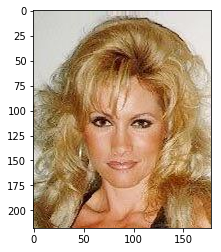

[  0 255]


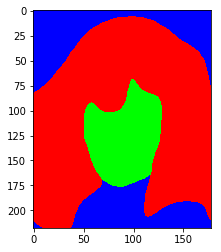

[0 1 2]


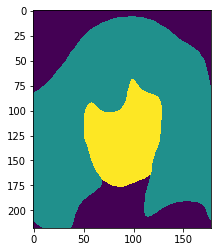

In [0]:
#display some training images and masks from the dataset

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline 

file = random.choice(os.listdir(DIR_JPEGImages))

img_arr = np.array(Image.open(DIR_JPEGImages + file))
plt.imshow(img_arr, interpolation='nearest')
plt.show()

mask1_arr = np.array(Image.open(DIR_SegmentationClass  + file))
print(np.unique(mask1_arr))
plt.imshow(mask1_arr, interpolation='nearest')
plt.show()

mask2_arr = np.array(Image.open(DIR_SegmentationClassRaw + file))
print(np.unique(mask2_arr))
plt.imshow(mask2_arr, interpolation='nearest')
plt.show()

In [0]:
#preprocessed and zipped in another notebook 

#celebA data and background/hair/skin masks

if not os.path.isfile('/content/celebA_preprocessed.zip'):
  fileId = drive.CreateFile({'id': '????????????????????????????'})
  fileId.GetContentFile('celebA_preprocessed.zip')  
  !unzip /content/celebA_preprocessed.zip > log_unzipceleba.txt
  
celebA_images = sorted(os.listdir('/content/content/celebA/images/'), key=lambda x: int(''.join(filter(str.isdigit, x))))                        
print('len: ' , len(celebA_images))

print(celebA_images)



with open(DIR_ImageSets + 'train.txt', 'a') as f:
    for i, filename in enumerate(celebA_images):
        new_filename = 'celebA_train'+ str(i)
        
        #png copys
        shutil.copy('/content/content/celebA/images/'+filename, DIR_JPEGImages + new_filename +'.png' )
        shutil.copy('/content/content/celebA/masks/'+filename, DIR_SegmentationClassRaw + new_filename +'.png' )
        
        f.write("%s\n" % new_filename) 
        
            
file = random.choice(os.listdir('/content/content/celebA/images/'))

img_arr = np.array(Image.open('/content/content/celebA/images/' + file))
plt.imshow(img_arr, interpolation='nearest')
plt.show()

mask1_arr = np.array(Image.open('/content/content/celebA/masks/'  + file))
print(np.unique(mask1_arr))
plt.imshow(mask1_arr, interpolation='nearest')
plt.show()

len:  3556
['000002.png', '000011.png', '000014.png', '000035.png', '000040.png', '000050.png', '000052.png', '000057.png', '000067.png', '000070.png', '000072.png', '000076.png', '000078.png', '000079.png', '000080.png', '000088.png', '000099.png', '000101.png', '000102.png', '000124.png', '000132.png', '000134.png', '000135.png', '000136.png', '000145.png', '000148.png', '000157.png', '000162.png', '000163.png', '000168.png', '000173.png', '000175.png', '000177.png', '000178.png', '000181.png', '000193.png', '000204.png', '000205.png', '000206.png', '000208.png', '000209.png', '000215.png', '000216.png', '000233.png', '000250.png', '000260.png', '000262.png', '000269.png', '000281.png', '000286.png', '000292.png', '000294.png', '000298.png', '000301.png', '000305.png', '000306.png', '000309.png', '000310.png', '000320.png', '000321.png', '000324.png', '000327.png', '000336.png', '000337.png', '000340.png', '000341.png', '000342.png', '000346.png', '000352.png', '000353.png', '000354.

In [0]:
#build the trainval text file
with open(DIR_ImageSets + 'trainval.txt', 'w') as outfile:
  for fname in [DIR_ImageSets + 'train.txt', DIR_ImageSets + 'val.txt']:
    with open(fname) as infile:
      outfile.write(infile.read()) 

In [0]:
print('DIR_JPEGImages (trainval folder): ', len(os.listdir(DIR_JPEGImages)))
print('DIR_SegmentationClassRaw (trainval folder):', len(os.listdir(DIR_SegmentationClassRaw)))

max_h = 0
max_w = 0
largest_dim = 0
for file in os.listdir(DIR_JPEGImages):
  x = np.array(Image.open(os.path.join(DIR_JPEGImages, file)))
  h = x.shape[0]
  w = x.shape[0]
  dim = h * w
  if dim > largest_dim:
    max_h = h
    max_w = w
    
print('max_h: ', max_h)
print('max_w: ', max_w)
print('largest_dim', largest_dim)

output_stride = 16
k_height = 0
while output_stride*k_height+1 <= max_h:
  k_height += 1

k_width = 0
while output_stride*k_width+1 <= max_w:
  k_width += 1  
  
print('k_height: ', k_height, ' , crop_height: ', output_stride*k_height+1)  
print('k_width: ', k_width, ' , crop_width: ', output_stride*k_width+1)  

DIR_JPEGImages (trainval folder):  9112
DIR_SegmentationClassRaw (trainval folder): 9112
max_h:  218
max_w:  218
largest_dim 0
k_height:  14  crop_height:  225
k_width:  14  crop_width:  225


In [0]:
#convert image data and metadata into tfrecord
DIR_tfrecord = '/content/models/research/deeplab/datasets/Custom_Dataset/tfrecord/'
if not os.path.exists(DIR_tfrecord):
  os.makedirs(DIR_tfrecord)
  

!python /content/models/research/deeplab/datasets/build_voc2012_data.py \
  --image_folder={DIR_JPEGImages} \
  --semantic_segmentation_folder={DIR_SegmentationClassRaw} \
  --list_folder={DIR_ImageSets} \
  --image_format="png" \
  --output_dir={DIR_tfrecord}

2019-06-13 15:27:06.195924: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-13 15:27:06.196267: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2483600 executing computations on platform Host. Devices:
2019-06-13 15:27:06.196307: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-06-13 15:27:06.429412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-06-13 15:27:06.429940: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x24831e0 executing computations on platform CUDA. Devices:
2019-06-13 15:27:06.429968: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2019-06-13 15:27:06.430302: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found de

## Running Deeplab

In [0]:
#these files are modified from the original files in deeplab repository

fileId = drive.CreateFile({'id': '?????????????????????????????'})
fileId.GetContentFile('train_utils.py')  
shutil.copy('/content/train_utils.py', '/content/models/research/deeplab/utils')

fileId = drive.CreateFile({'id': '?????????????????????????????'})
fileId.GetContentFile('data_generator.py')  
shutil.copy('/content/data_generator.py', '/content/models/research/deeplab/datasets/')

fileId = drive.CreateFile({'id': '?????????????????????????????'})
fileId.GetContentFile('eval.py')  
shutil.copy('/content/eval.py', '/content/models/research/deeplab')



# !cp /content/train_utils.py /content/models/research/deeplab/utils
# !cp /content/data_generator.py /content/models/research/deeplab/datasets/
# !cp /content/eval.py /content/models/research/deeplab

'/content/models/research/deeplab/eval.py'

In [0]:
if not os.path.isfile('/content/deeplabv3_pascal_trainval_2018_01_04.tar.gz'):
  !wget http://download.tensorflow.org/models/deeplabv3_pascal_trainval_2018_01_04.tar.gz
  !tar -zxvf /content/deeplabv3_pascal_trainval_2018_01_04.tar.gz

# if not os.path.isfile('/content/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz'):
#   !wget http://download.tensorflow.org/models/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz
#   !tar -zxvf /content/deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz 

--2019-06-13 15:28:34--  http://download.tensorflow.org/models/deeplabv3_pascal_trainval_2018_01_04.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460669898 (439M) [application/x-tar]
Saving to: ‘deeplabv3_pascal_trainval_2018_01_04.tar.gz’

deeplabv3_pascal_tr 100%[===================>] 439.33M   195MB/s    in 2.3s    

2019-06-13 15:28:37 (195 MB/s) - ‘deeplabv3_pascal_trainval_2018_01_04.tar.gz’ saved [460669898/460669898]

deeplabv3_pascal_trainval/
deeplabv3_pascal_trainval/model.ckpt.index
deeplabv3_pascal_trainval/frozen_inference_graph.pb
deeplabv3_pascal_trainval/model.ckpt.data-00000-of-00001


Run Training

In [0]:
DIR_train = '/content/models/research/deeplab/datasets/Custom_Dataset/train/'
DIR_eval = '/content/models/research/deeplab/datasets/Custom_Dataset/eval/'
DIR_vis = '/content/models/research/deeplab/datasets/Custom_Dataset/vis/'

if os.path.exists(DIR_train):
  shutil.rmtree(DIR_train)
if os.path.exists(DIR_eval):
  shutil.rmtree(DIR_eval)
if os.path.exists(DIR_vis):
  shutil.rmtree(DIR_vis)

In [0]:
#to open tensorboard open the link in the output
#NOTE: there are problems with the package and tensorboard at times
import os

if os.path.isfile('/content/ngrok-stable-linux-amd64.zip'):
  print('already downloaded zip file')
else:
  !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -P /content/
  !unzip /content/ngrok-stable-linux-amd64.zip

  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(DIR_train))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-06-13 15:29:34--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.72.145.109, 52.201.75.180, 52.73.94.166, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.72.145.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘/content/ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  84.8MB/s    in 0.2s    

2019-06-13 15:29:34 (84.8 MB/s) - ‘/content/ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://2f677223.ngrok.io


In [0]:
os.makedirs(DIR_train)

#if continueing from a custom saved checkpoint rather than the pascal voc ckpt
DIR_custom_ckpt = DIR_train + 'custom_ckpt/'
if os.path.exists(DIR_custom_ckpt):
  shutil.rmtree(DIR_custom_ckpt)
  os.makedirs(DIR_custom_ckpt)
else:
  os.makedirs(DIR_custom_ckpt)
  
!unzip /content/saved_ckpt.zip -d {DIR_custom_ckpt}

max_iter = 0
for f in os.listdir(DIR_custom_ckpt):
  if 'model.ckpt' in f:
    i = int(f.split('model.ckpt-')[1].split('.')[0]) 
    if i > max_iter:
      max_iter = i
custom_ckpt_filename = 'model.ckpt-' + str(max_iter)

#--model_variant="xception_65"  --tf_initial_checkpoint="/content/deeplabv3_pascal_trainval/model.ckpt"
#--model_variant="mobilenet_v2" --tf_initial_checkpoint="/content/deeplabv3_mnv2_pascal_trainval/model.ckpt-30000"
!python /content/models/research/deeplab/train.py \
  --logtostderr \
  --training_number_of_steps=10000\
  --train_split="train" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --train_crop_size="513,513" \
  --train_batch_size=4 \
  --train_logdir={DIR_train} \
  --dataset_dir={DIR_tfrecord} \
  --dataset='hairskin'\
  --initialize_last_layer=False\
  --last_layers_contain_logits_only=True\
  --save_interval_secs=600 \
  --tf_initial_checkpoint={DIR_custom_ckpt + custom_ckpt_filename} \

  # --tf_initial_checkpoint="/content/deeplabv3_pascal_trainval/model.ckpt" \
  #--fine_tune_batch_norm=True \   #default to true, must have batch size greater than 1 otherwise NaN error 
  

Archive:  /content/saved_ckpt.zip
  inflating: /content/models/research/deeplab/datasets/Custom_Dataset/train/custom_ckpt/model.ckpt-10000.data-00000-of-00002  
  inflating: /content/models/research/deeplab/datasets/Custom_Dataset/train/custom_ckpt/model.ckpt-10000.data-00001-of-00002  
  inflating: /content/models/research/deeplab/datasets/Custom_Dataset/train/custom_ckpt/model.ckpt-10000.index  
  inflating: /content/models/research/deeplab/datasets/Custom_Dataset/train/custom_ckpt/model.ckpt-10000.meta  

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Training on train set
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions fo

Run evaluation

In [0]:
# !cp /content/eval.py /content/models/research/deeplab

# shutil.rmtree(DIR_eval)

In [0]:
os.makedirs(DIR_eval)

!python /content/models/research/deeplab/eval.py \
  --logtostderr \
  --eval_split="val" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --eval_crop_size="513,513" \
  --decoder_output_stride=4 \
  --dataset="hairskin"\
  --checkpoint_dir={DIR_train} \
  --eval_logdir={DIR_eval} \
  --dataset_dir={DIR_tfrecord} \
  --max_number_of_evaluations=1 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Evaluating on val set
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Performing single-scale test.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
6 ops no flops stats due to incomplete shapes.
Parsing Inputs...

=========================Options=============================
-max_

In [0]:
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.framework import dtypes

for event in tf.train.summary_iterator(DIR_eval + os.listdir(DIR_eval)[0]):
    for value in event.summary.value:
        print(value.tag)
        if value.HasField('simple_value'):
            print(value.simple_value)
        if value.HasField('tensor') and value.tag == 'confusion_matrix_1':
          
            cm = np.fromstring(value.tensor.tensor_content, dtype=np.float64).reshape((4,4))[:-1,:-1]
            print(cm)
            #calc per class IoU, code from https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb#scrollTo=c2E4PMGRKLSu
            intersection = np.diag(cm)
            union = np.sum(cm, 0) + np.sum(cm, 1) - np.diag(cm)
            class_iou = np.round(intersection / union, 5)
            
            with open('/content/iou.txt', 'w') as f:
              for i in range(len(class_iou)):
                print('class_'+str(i)+': ', class_iou[i])
                f.write('class_'+str(i)+': ' + str(class_iou[i]) + '\n')
              print('mean_iou: ', np.mean(class_iou[~np.isnan(class_iou)]))
              f.write('mean_iou: '+ str(np.mean(class_iou[~np.isnan(class_iou)]))  + '\n')
            

miou_1.0
0.8204120993614197
confusion_matrix_1
[[20143244.   976116.   234553.]
 [   42435.  3081805.   105291.]
 [  349426.   326775.  5990355.]]
class_0:  0.92631
class_1:  0.67995
class_2:  0.85498
mean_iou:  0.8204133333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


Run Visualization

In [0]:
os.makedirs(DIR_vis)

!python /content/models/research/deeplab/vis.py \
  --logtostderr \
  --vis_split="val" \
  --model_variant="xception_65" \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \
  --vis_crop_size="513,513" \
  --dataset="hairskin" \
  --checkpoint_dir={DIR_train}\
  --vis_logdir={DIR_vis} \
  --dataset_dir={DIR_tfrecord} \
  --max_number_of_iterations=1 



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Visualizing on val set
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Performing single-scale test.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Waiting for new checkpoint at /content/models/research/deeplab/datasets/Custom_Dataset/train/
INFO:tensorflow:Found new checkpoint at /content/models/research/deeplab/datasets/Custom_Dataset/train/model.ckpt-10000
INFO:tensorflow:Starting visualization at 2019-06-13-23:50:58
INFO:tensorflow:Visualizing with model /content/models/research/deeplab/datasets/Custom_Dataset/train/model.ckpt-10000
INFO:tensorflow:Graph was finalized.
2019-06-13 23:50:59.887048: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000

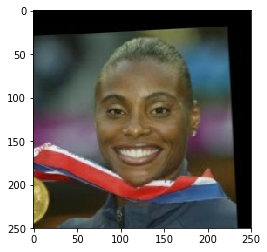

[[  0   0   0]
 [  0 128   0]
 [128   0   0]]


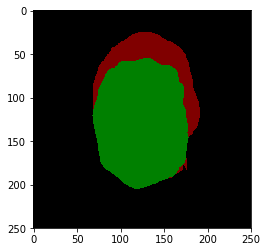

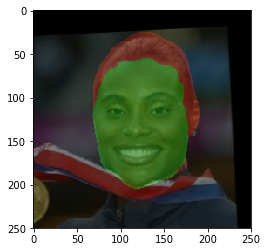

In [0]:
import random

pred_imgs = sorted([f for f in os.listdir(DIR_vis+'segmentation_results') if 'image' in f], key=lambda x: int(''.join(filter(str.isdigit, x))))
pred_masks = sorted([f for f in os.listdir(DIR_vis+'segmentation_results') if 'prediction' in f], key=lambda x: int(''.join(filter(str.isdigit, x))))

rnum = random.randint(0, len(pred_imgs))


img = np.array(Image.open(DIR_vis+'segmentation_results/' + pred_imgs[rnum]))
plt.imshow(img, interpolation='nearest')
plt.show()


mask = np.array(Image.open(DIR_vis+'segmentation_results/' + pred_masks[rnum]))
print(np.unique(mask.reshape(-1, mask.shape[2]), axis=0))
plt.imshow(mask)
plt.show()


#show img overlayed with mask
img = np.array(Image.open(DIR_vis+'segmentation_results/' + pred_imgs[rnum]))
plt.imshow(img, interpolation='nearest')

mask = np.array(Image.open(DIR_vis+'segmentation_results/' + pred_masks[rnum]))

mask = np.ma.masked_where(mask == 0, mask)
plt.imshow(mask, alpha = 0.5)
plt.show()



Save model

In [0]:
DIR_export = '/content/export'

if os.path.exists(DIR_export):
  shutil.rmtree(DIR_export)
  os.makedirs(DIR_export)
else:
  os.makedirs(DIR_export)

max_iter = 0
for f in os.listdir(DIR_train):
  if 'model.ckpt' in f:
    i = int(f.split('model.ckpt-')[1].split('.')[0]) 
    if i > max_iter:
      max_iter = i

ckpt_filename = 'model.ckpt-' + str(max_iter)
ckpt_path = os.path.join(DIR_train, ckpt_filename)
export_path = os.path.join(DIR_export,'frozen_inference_graph.pb')

print('Exporting model from: ', ckpt_path)

!python /content/models/research/deeplab/export_model.py \
  --logtostderr \
  --checkpoint_path={ckpt_path} \
  --export_path={export_path} \
  --model_variant="xception_65" \
  --num_classes=4 \
  --crop_size='513' \
  --crop_size='513' \
  --inference_scales=1.0 \
  --atrous_rates=6 \
  --atrous_rates=12 \
  --atrous_rates=18 \
  --output_stride=16 \
  --decoder_output_stride=4 \


!cp /content/export/frozen_inference_graph.pb /content/

Exporting model from:  /content/models/research/deeplab/datasets/Custom_Dataset/train/model.ckpt-10000
INFO:tensorflow:Prepare to export model to: /content/export/frozen_inference_graph.pb
INFO:tensorflow:Exported model performs single-scale inference.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use tf.global_variables instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
2019-06-13 23:51:58.554632: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-13 23:51:58.554821: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2559020 executing computations on platform Host. Devices:
2019-06-13 23:51:58.554860: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-06-13 23:51:58.667364: I tensorflow/stream_executor/cuda/cuda_gpu_execu

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#if saving the frozen graph
print('SAVING frozen graph to google drive...\n')
uploaded = drive.CreateFile({'title': 'frozen_inference_graph.pb'})
uploaded.SetContentFile('/content/export/frozen_inference_graph.pb')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))




#if saving the ckpt 
print('\nSAVING ckpt to google drive....\n')
files = [ f for f in os.listdir(DIR_train) if ckpt_filename in f]
print(files)

if os.path.exists('/content/models/research/deeplab/datasets/Custom_Dataset/train/saved_ckpt'):
  shutil.rmtree('/content/models/research/deeplab/datasets/Custom_Dataset/train/saved_ckpt')
  os.makedirs('/content/models/research/deeplab/datasets/Custom_Dataset/train/saved_ckpt')
else:
  os.makedirs('/content/models/research/deeplab/datasets/Custom_Dataset/train/saved_ckpt')
  
for f in files:
  shutil.copy(DIR_train+f, DIR_train+'saved_ckpt/'+f)

!zip -j saved_ckpt.zip /content/models/research/deeplab/datasets/Custom_Dataset/train/saved_ckpt/*

uploaded = drive.CreateFile({'title': 'saved_ckpt.zip'})
uploaded.SetContentFile('/content/saved_ckpt.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

##Run on Images

https://github.com/tensorflow/models/blob/master/research/deeplab/deeplab_demo.ipynb

In [0]:
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

In [0]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#download the frozen graph
import os

%cd /content/

if not os.path.isfile('/content/frozen_inference_graph.pb'):
  fileId = drive.CreateFile({'id': '?????????????????????????????'})
  fileId.GetContentFile('frozen_inference_graph.pb') 

/content



Import helper methods¶

These methods help us perform the following tasks:

Load the latest version of the pretrained DeepLab model

Load the colormap from the PASCAL VOC dataset

Adds colors to various labels, such as "pink" for people, "green" for bicycle and more

Visualize an image, and add an overlay of colors on various regions

In [0]:
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph.pb'

  def __init__(self, frozen_graph_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    with tf.gfile.GFile(frozen_graph_path, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    
    return resized_image, seg_map


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap


def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()
  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]


def vis_segmentation(image, seg_map, prediction_path=None):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  #seg_image = seg_map
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  if prediction_path != None:
    plt.savefig(prediction_path)
  plt.show()


LABEL_NAMES = np.asarray([
    'background', 'hair','skin'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

#print(FULL_COLOR_MAP)

In [0]:
# from matplotlib.image import imread

# img = Image.open('/content/models/research/deeplab/datasets/Custom_Dataset/JPEGImages/train1.png').convert('RGB')
# mask = imread('/content/models/research/deeplab/datasets/Custom_Dataset/SegmentationClassRaw/train1.png').astype(np.uint8)
# plt.imshow(Image.open('/content/models/research/deeplab/datasets/Custom_Dataset/SegmentationClassRaw/train1.png'))
# plt.show()

# print(np.unique(mask))

# print(mask.shape)

# vis_segmentation(img,mask )

Select a pretrained model¶

We have trained the DeepLab model using various backbone networks. Select one from the MODEL_NAME list.

In [0]:
frozen_graph_path = '/content/frozen_inference_graph.pb'

MODEL = DeepLabModel(frozen_graph_path)
print('model loaded successfully!')

model loaded successfully!


Run on sample images¶

Select one of sample images (leave IMAGE_URL empty) or feed any internet image url for inference.

Note that this colab uses single scale inference for fast computation, so the results may slightly differ from the visualizations in the README file, which uses multi-scale and left-right flipped inputs.

In [0]:
!unzip testing_images.zip

In [0]:
!unzip final.zip

In [0]:
DIR_testing_images = '/content/'

valid_images_ext = [".jpg",".gif",".png"]

# Append any additional directory you want to check to list_of_dirs
list_of_dirs = []
#list_of_dirs.append('/content/')
#list_of_dirs.append('/content/testing_images')
#list_of_dirs.append('/content/validation_images')
list_of_dirs.append('/content/content/faces/final')

TEST_IMAGE_PATHS = []

for check_dir in list_of_dirs:
  for file in os.listdir(check_dir):
    for ext in valid_images_ext:
      if file.endswith(ext):
        TEST_IMAGE_PATHS.append(os.path.join(check_dir, file))
        
print(TEST_IMAGE_PATHS)        


['/content/content/faces/final/shortwomen1.jpg', '/content/content/faces/final/kinky4.jpg', '/content/content/faces/final/shortwomen4.jpg', '/content/content/faces/final/shortwomen8.jpg', '/content/content/faces/final/curly2.jpg', '/content/content/faces/final/shortmen4.jpg', '/content/content/faces/final/shortmen3.jpg', '/content/content/faces/final/braids2.jpg', '/content/content/faces/final/dreadlocks2.jpg', '/content/content/faces/final/shortmen6.jpg', '/content/content/faces/final/straight4.jpg', '/content/content/faces/final/wavy4.jpg', '/content/content/faces/final/kinky3.jpg', '/content/content/faces/final/straight1.jpg', '/content/content/faces/final/kinky2.jpg', '/content/content/faces/final/kinky1.jpg', '/content/content/faces/final/wavy1.jpg', '/content/content/faces/final/dreadlocks4.jpg', '/content/content/faces/final/shortwomen7.jpg', '/content/content/faces/final/braids4.jpg', '/content/content/faces/final/shortwomen3.jpg', '/content/content/faces/final/shortwomen6.jpg'

In [0]:
def run_visualization(path, prediction_save_path):
  """Inferences DeepLab model and visualizes result."""
  try:
    original_im = Image.open(path)
  except IOError:
    print('Cannot retrieve image. Please check path: ' + path)
    return

  print('running deeplab on image %s...' % path)
  resized_im, seg_map = MODEL.run(original_im)

  vis_segmentation(resized_im, seg_map, prediction_save_path)

In [0]:
#create dir to save preds  
DIR_pred_save = '/content/testing/vis/'
if os.path.exists(DIR_pred_save):
  shutil.rmtree(DIR_pred_save)
  os.makedirs(DIR_pred_save)
else:
  os.makedirs(DIR_pred_save)  

#make preds  
for path in TEST_IMAGE_PATHS[:]:
  filename = os.path.basename(path)
  run_visualization(path, DIR_pred_save + filename )

if os.path.exists('/content/testing_preds.zip'):  
  os.remove('/content/testing_preds.zip')
!zip /content/testing_preds.zip -r '/content/testing/vis/'  



#if saving predictions to drive
drive = GoogleDrive(gauth)
uploaded = drive.CreateFile({'title': 'testing_preds.zip'})
uploaded.SetContentFile('/content/testing_preds.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))
  
  
  
  
#run_visualization('/content/models/research/deeplab/datasets/Custom_Dataset/vis/segmentation_results/000002_image.png')  

Output hidden; open in https://colab.research.google.com to view.

#ARCHIVE

In [0]:
# #load and move files into the pascal_voc directory format

# import shutil
# from PIL import Image


# filenames_test_img = sorted(os.listdir('/content/testing_images/'), key=lambda x: int(''.join(filter(str.isdigit, x))))
# print('len test: ' , len(filenames_test_img) ) 

# #create new folders
# DIR_testing_images = '/content/testing/images/'
# DIR_testing_ImageSets = '/content/testing/ImageSets/'
# DIR_testing_fakemasks = '/content/testing/SegmentationClass/'

# if not os.path.exists(DIR_testing_images):
#   os.makedirs(DIR_testing_images)
# if not os.path.exists(DIR_testing_ImageSets):
#   os.makedirs(DIR_testing_ImageSets)
# if not os.path.exists(DIR_testing_fakemasks):
#   os.makedirs(DIR_testing_fakemasks)

  
# with open(DIR_testing_ImageSets + 'test.txt', 'w') as f:
#   for i, img in enumerate(filenames_test_img):
#     new_filename = 'test'+ str(i)

#     #jpg copys
#     shutil.copy('/content/testing_images/'+img, DIR_testing_images + new_filename +'.jpg' )
    
#     #make a fake mask
#     img = np.asarray(Image.open('/content/testing_images/'+img))
    
#     arr_2d = np.random.randint(3,size=(img.shape[0], img.shape[1]), dtype=np.uint8)
#     Image.fromarray(arr_2d).save(DIR_testing_fakemasks + new_filename +'.png' )
    
#     f.write("%s\n" % new_filename)
               

In [0]:
# #convert image data and metadata into tfrecord
# DIR_testing_tfrecord = '/content/testing/tfrecord'
# if not os.path.exists(DIR_testing_tfrecord):
#   os.makedirs(DIR_testing_tfrecord)
  

# !python /content/models/research/deeplab/datasets/build_voc2012_data.py \
#   --image_folder={DIR_testing_images} \
#   --semantic_segmentation_folder={DIR_testing_fakemasks} \
#   --list_folder={DIR_testing_ImageSets} \
#   --image_format="jpg" \
#   --output_dir={DIR_testing_tfrecord}

In [0]:
# DIR_testing_vis = '/content/testing/vis/'
# if os.path.exists(DIR_testing_vis):
#   shutil.rmtree(DIR_testing_vis)
#   os.makedirs(DIR_testing_vis)
# else:
#   os.makedirs(DIR_testing_vis)

# !python /content/models/research/deeplab/vis.py \
#   --logtostderr \
#   --vis_split="test" \
#   --model_variant="xception_65" \
#   --atrous_rates=6 \
#   --atrous_rates=12 \
#   --atrous_rates=18 \
#   --output_stride=16 \
#   --decoder_output_stride=4 \
#   --vis_crop_size="513,513" \
#   --dataset="hairskin_test" \
#   --checkpoint_dir={DIR_train}\
#   --vis_logdir={DIR_testing_vis } \
#   --dataset_dir={DIR_testing_tfrecord} \
#   --max_number_of_iterations=1 